[[ 0.65469977  0.23012321 -0.77908636 -0.61625111]
 [-0.7189577  -0.59451811 -0.01388971  0.33227712]
 [-0.8956286  -0.96439086 -0.01388971  3.06074654]
 [-0.37647034 -0.92177231 -0.01388971  0.04634703]
 [-0.22477811 -0.70842356  2.0266347  -0.61625111]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

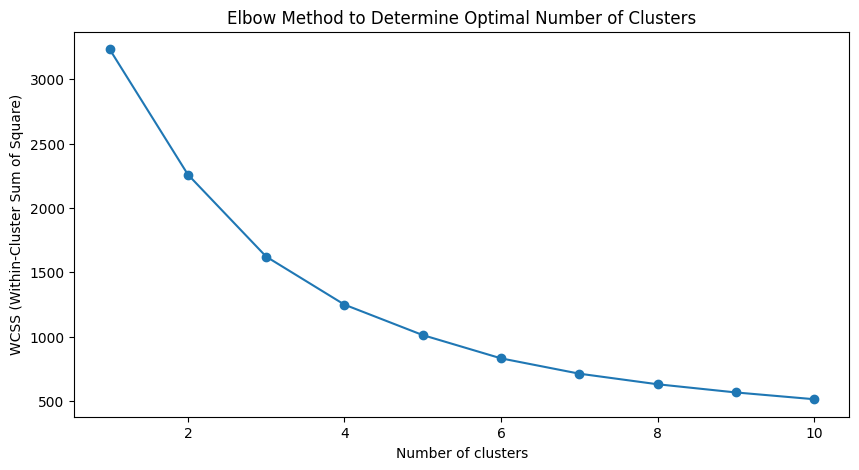

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


          Actual price  Discount price     Stars       Rating
Cluster                                                      
0         63706.787763    43044.506692  4.203059   355.227533
1        122985.672131    92012.368852  4.218033   103.286885
2         53350.527607    38868.828221  4.203681  4608.177914


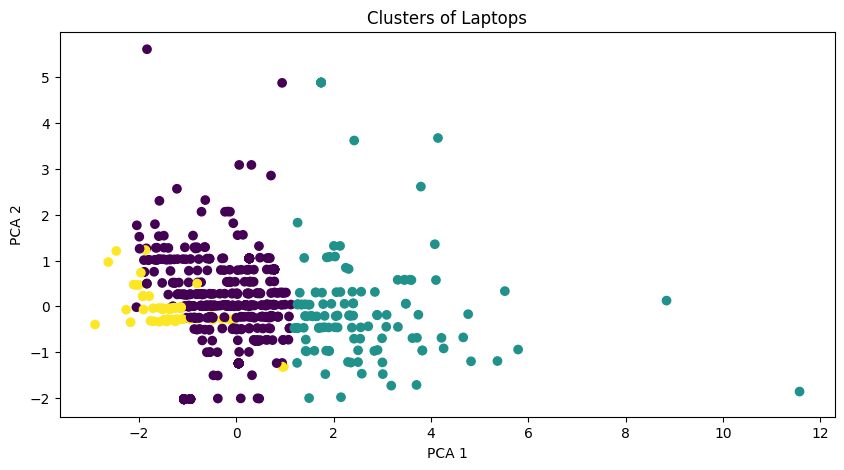

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset (assuming the file is already loaded as df_new)
df_new = pd.read_excel('/content/Flipkart-Laptops.xlsx', sheet_name='FP_LP') # Removed extra indent

# Data Preprocessing
# Replace 'NIL' and missing values with appropriate numerical values
df_new['Stars'] = pd.to_numeric(df_new['Stars'].replace('NIL', np.nan), errors='coerce')
df_new['Rating'] = pd.to_numeric(df_new['Rating'].str.replace(' Ratings', '').str.replace(',', ''), errors='coerce')
df_new['Actual price'] = pd.to_numeric(df_new['Actual price'], errors='coerce')
df_new['Discount price'] = pd.to_numeric(df_new['Discount price'], errors='coerce')

# Drop rows with missing values in relevant columns
df_cleaned = df_new[['Actual price', 'Discount price', 'Stars', 'Rating']].dropna()

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned)

# Display the first few rows of scaled features
print(scaled_features[:5])

# Determine the Optimal Number of Clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Square)')
plt.show()

# Perform Clustering (assuming 3 is the optimal number of clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original dataframe
df_cleaned['Cluster'] = clusters

# Analyze the Characteristics of Each Cluster
cluster_analysis = df_cleaned.groupby('Cluster').mean()
print(cluster_analysis)

# Visualization of Clusters using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(10, 5))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters of Laptops')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Accuracy: 0.9382716049382716
Precision: 0.9417040358744395
Recall: 0.9905660377358491
Confusion Matrix:
[[ 18  13]
 [  2 210]]


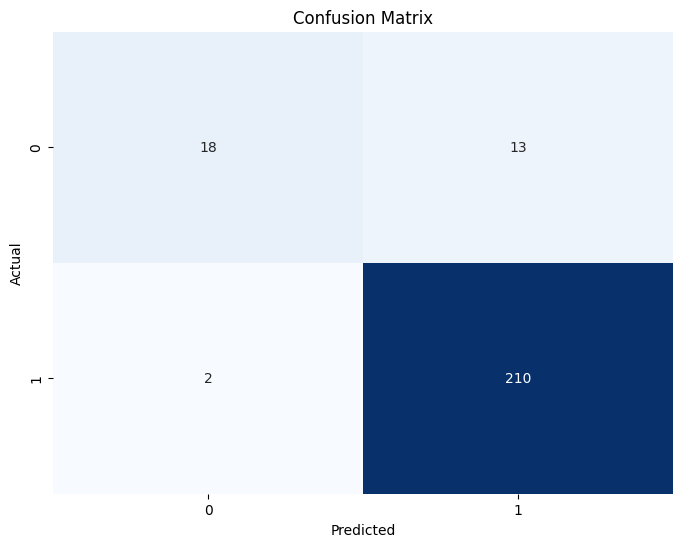

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (assuming the file is already loaded as df_new)
df_new = pd.read_excel('/content/Flipkart-Laptops.xlsx', sheet_name='FP_LP') # Removed extra indent

# Data Preprocessing
# Replace 'NIL' and missing values with appropriate numerical values
df_new['Stars'] = pd.to_numeric(df_new['Stars'].replace('NIL', np.nan), errors='coerce')
df_new['Rating'] = pd.to_numeric(df_new['Rating'].str.replace(' Ratings', '').str.replace(',', ''), errors='coerce')
df_new['Actual price'] = pd.to_numeric(df_new['Actual price'], errors='coerce')
df_new['Discount price'] = pd.to_numeric(df_new['Discount price'], errors='coerce')

# Drop rows with missing values in relevant columns
df_cleaned = df_new[['Actual price', 'Discount price', 'Stars', 'Rating']].dropna()

# Create a binary target variable (e.g., rating >= 4.0 is considered "highly rated")
df_cleaned['High Rating'] = np.where(df_cleaned['Rating'] >= 4.0, 1, 0)

# Select features and the target variable
features = df_cleaned[['Actual price', 'Discount price', 'Stars']]
target = df_cleaned['High Rating']

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression(random_state=42)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()